In [1]:
import pandas as pd
import numpy as np

In [7]:
df= pd.read_csv('POWER.csv')
df

,YEAR,MO,DY,HR,T2M
0,2001,1,1,5,12.86
1,2001,1,1,6,12.65
2,2001,1,1,7,12.70
3,2001,1,1,8,13.11
4,2001,1,1,9,14.01
...,...,...,...,...,...
87667,2011,1,2,0,5.80
87668,2011,1,2,1,5.18
87669,2011,1,2,2,4.62
87670,2011,1,2,3,4.12


In [8]:
df["Date"] = pd.to_datetime(df["YEAR"].apply(str) + "/" + df["MO"].apply(str) + "/" + df["DY"].apply(str)+ " " + df["HR"].apply(str)+ ":" +"00")
df=df.iloc[:,4:]
df=df.set_index('Date')
df

,T2M
Date,
2001-01-01 05:00:00,12.86
2001-01-01 06:00:00,12.65
2001-01-01 07:00:00,12.70
2001-01-01 08:00:00,13.11
2001-01-01 09:00:00,14.01
...,...
2011-01-02 00:00:00,5.80
2011-01-02 01:00:00,5.18
2011-01-02 02:00:00,4.62


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import time
#from pycaret.time_series import TSForecastingExperiment
import statsmodels.api as sm

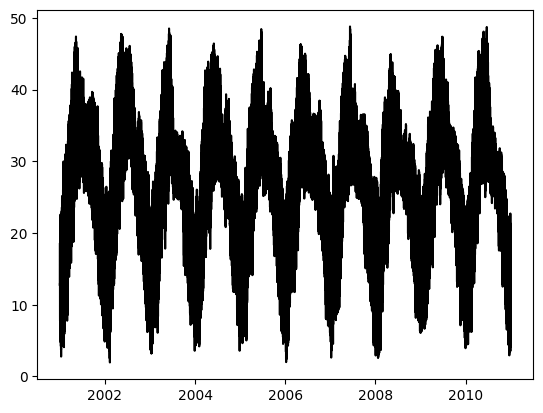

In [12]:
decomposition = sm.tsa.seasonal_decompose(df['T2M'], model='additive')
plt.plot(df.index, df['T2M'],color= "#000000", label="T2M")

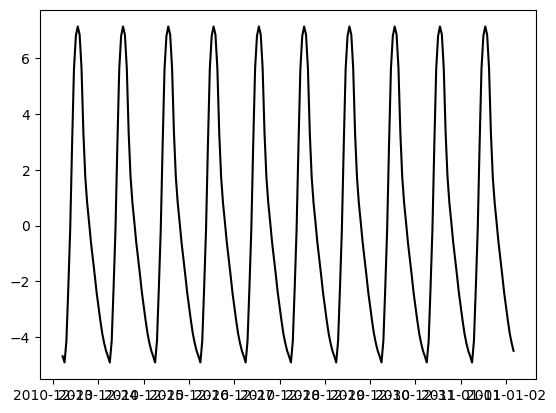

In [17]:
df1=df.iloc[-240:,:]
decomposition = sm.tsa.seasonal_decompose(df1['T2M'], model='additive')
plt.plot(df1.index, decomposition.seasonal,color= "#000000",label='T2M')

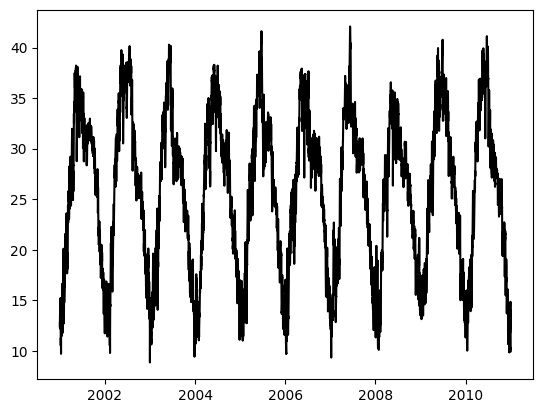

In [20]:
decomposition = sm.tsa.seasonal_decompose(df['T2M'], model='additive')
plt.plot(df.index, decomposition.trend,color= "#000000", label='T2M')

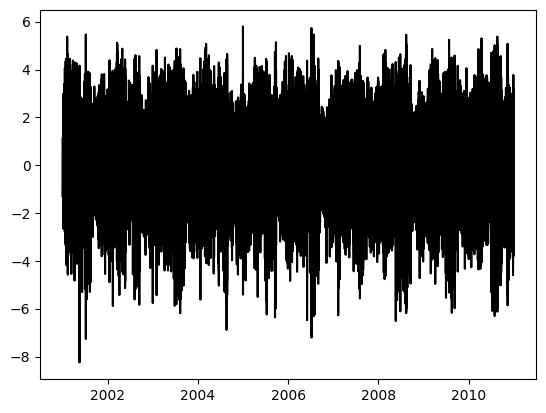

In [22]:
decomposition = sm.tsa.seasonal_decompose(df['T2M'], model='additive')
plt.plot(df.index, decomposition.resid,color= "#000000",label='T2M')